Mounted at /content/gdrive


# Test script for loading and testing BI_LSTM attention model , display metrics ( loss, accuracy , confusion matrix , ROC curve) scroll down to see these plots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf

# !pip install tensorflow==2.15.0


print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



2.15.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8804258783734416696
xla_global_id: -1
]


In [ ]:
### DATA LOAD AND SAVE save the data to file and re-load them - this data pre-processed earlier
import numpy as np
import os

# Define paths for saving  and  loading data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'



# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# verfiy shape
print(X_train1.dtype)
print(X_test1.dtype)
print(Y_train.dtype)
print(Y_test.dtype)

float64
float64
int64
int64


9156/9156 [==============================] - 749s 82ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       0.98      1.00      0.99      1963
           2       1.00      1.00      1.00     39342
           3       1.00      1.00      1.00     72494
           4       1.00      1.00      1.00     35332
           5       1.00      1.00      1.00     86186
           6       1.00      1.00      1.00     55090
           7       0.92      0.92      0.92       382

    accuracy                           1.00    292973
   macro avg       0.99      0.99      0.99    292973
weighted avg       1.00      1.00      1.00    292973



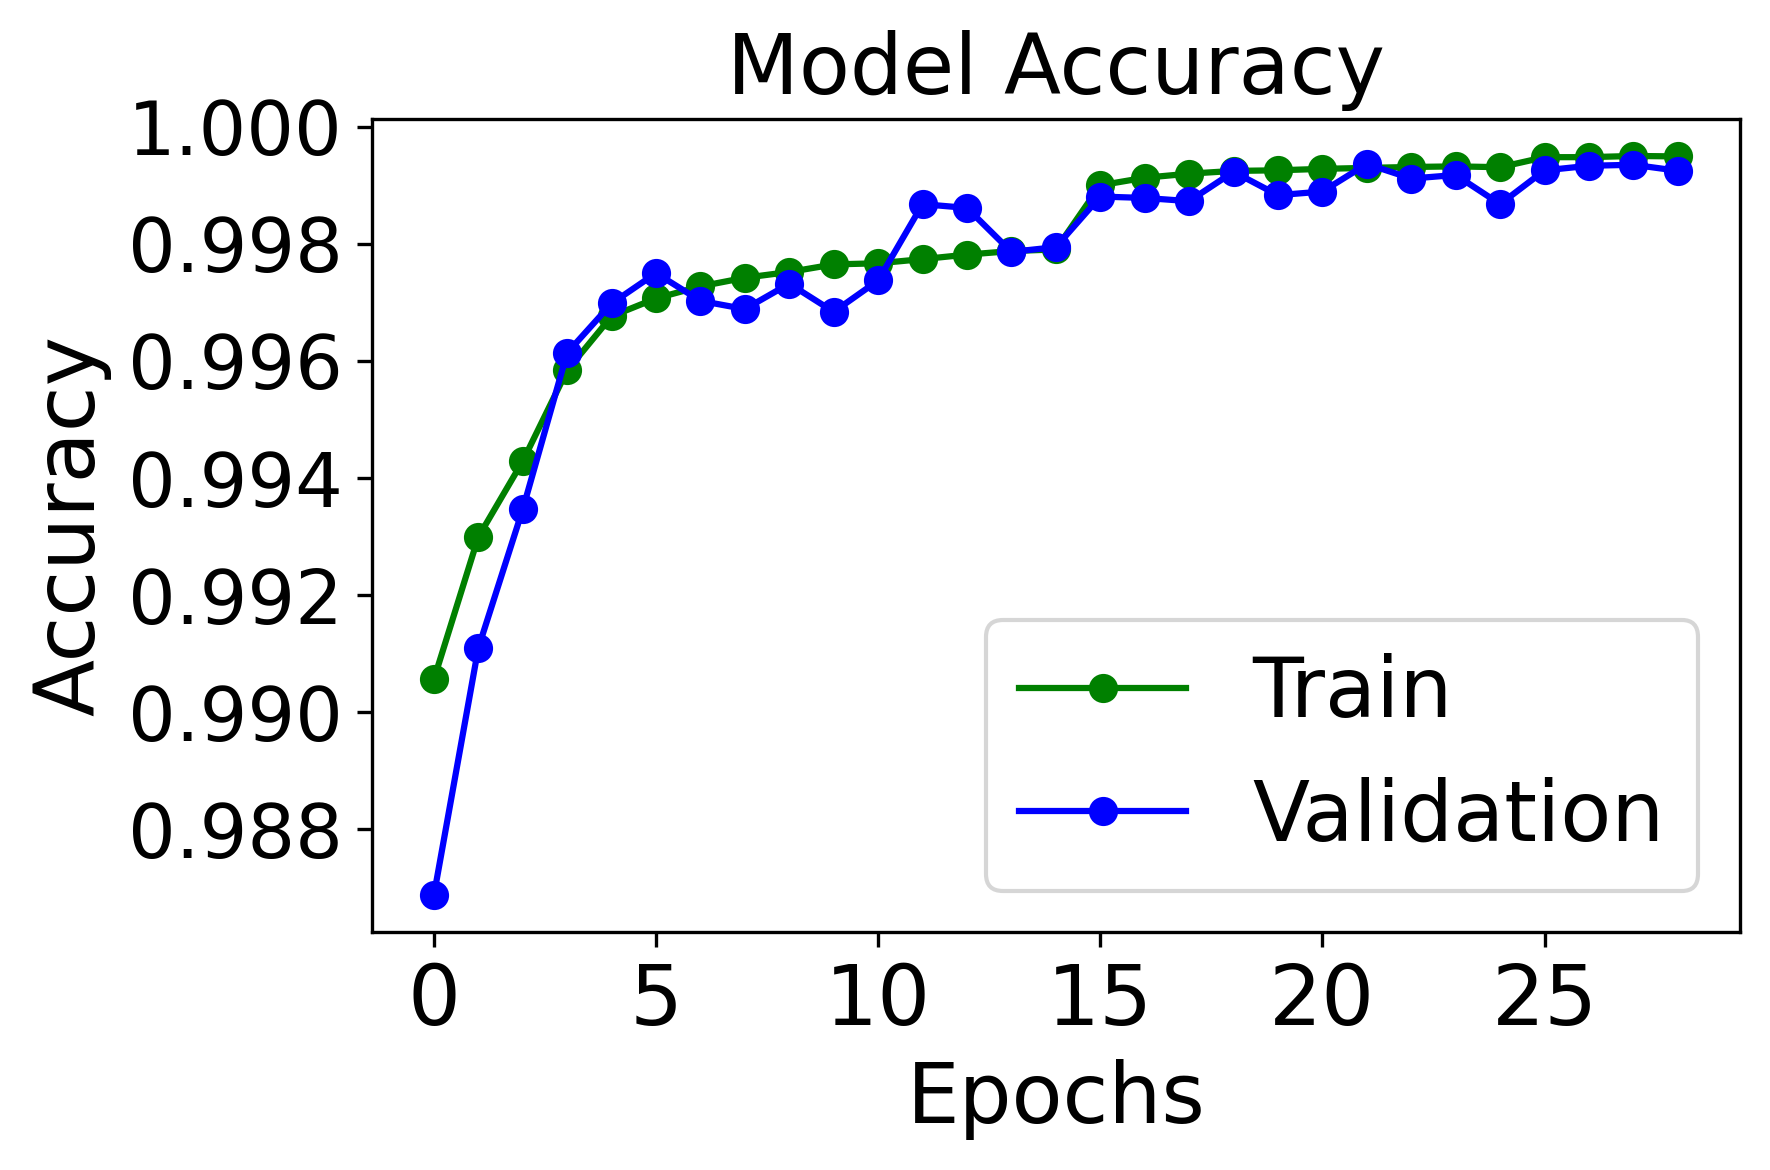

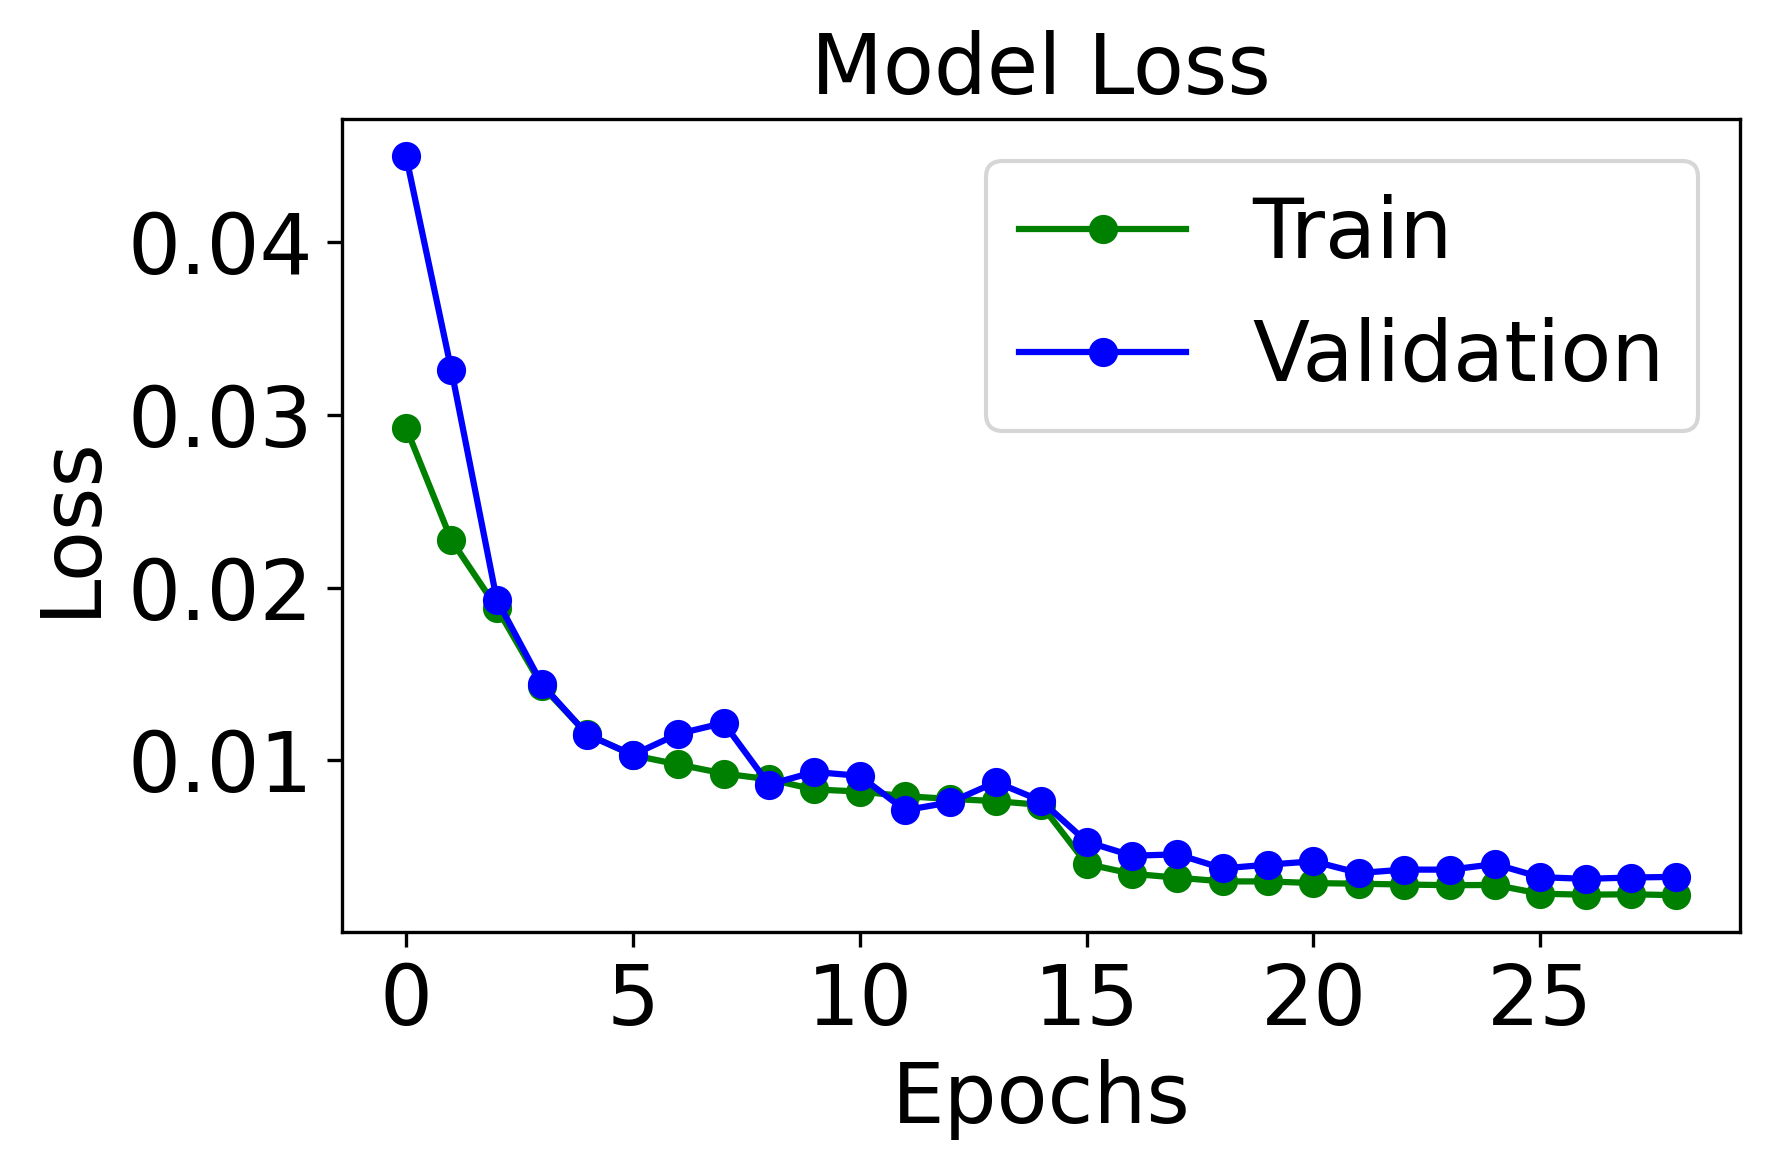

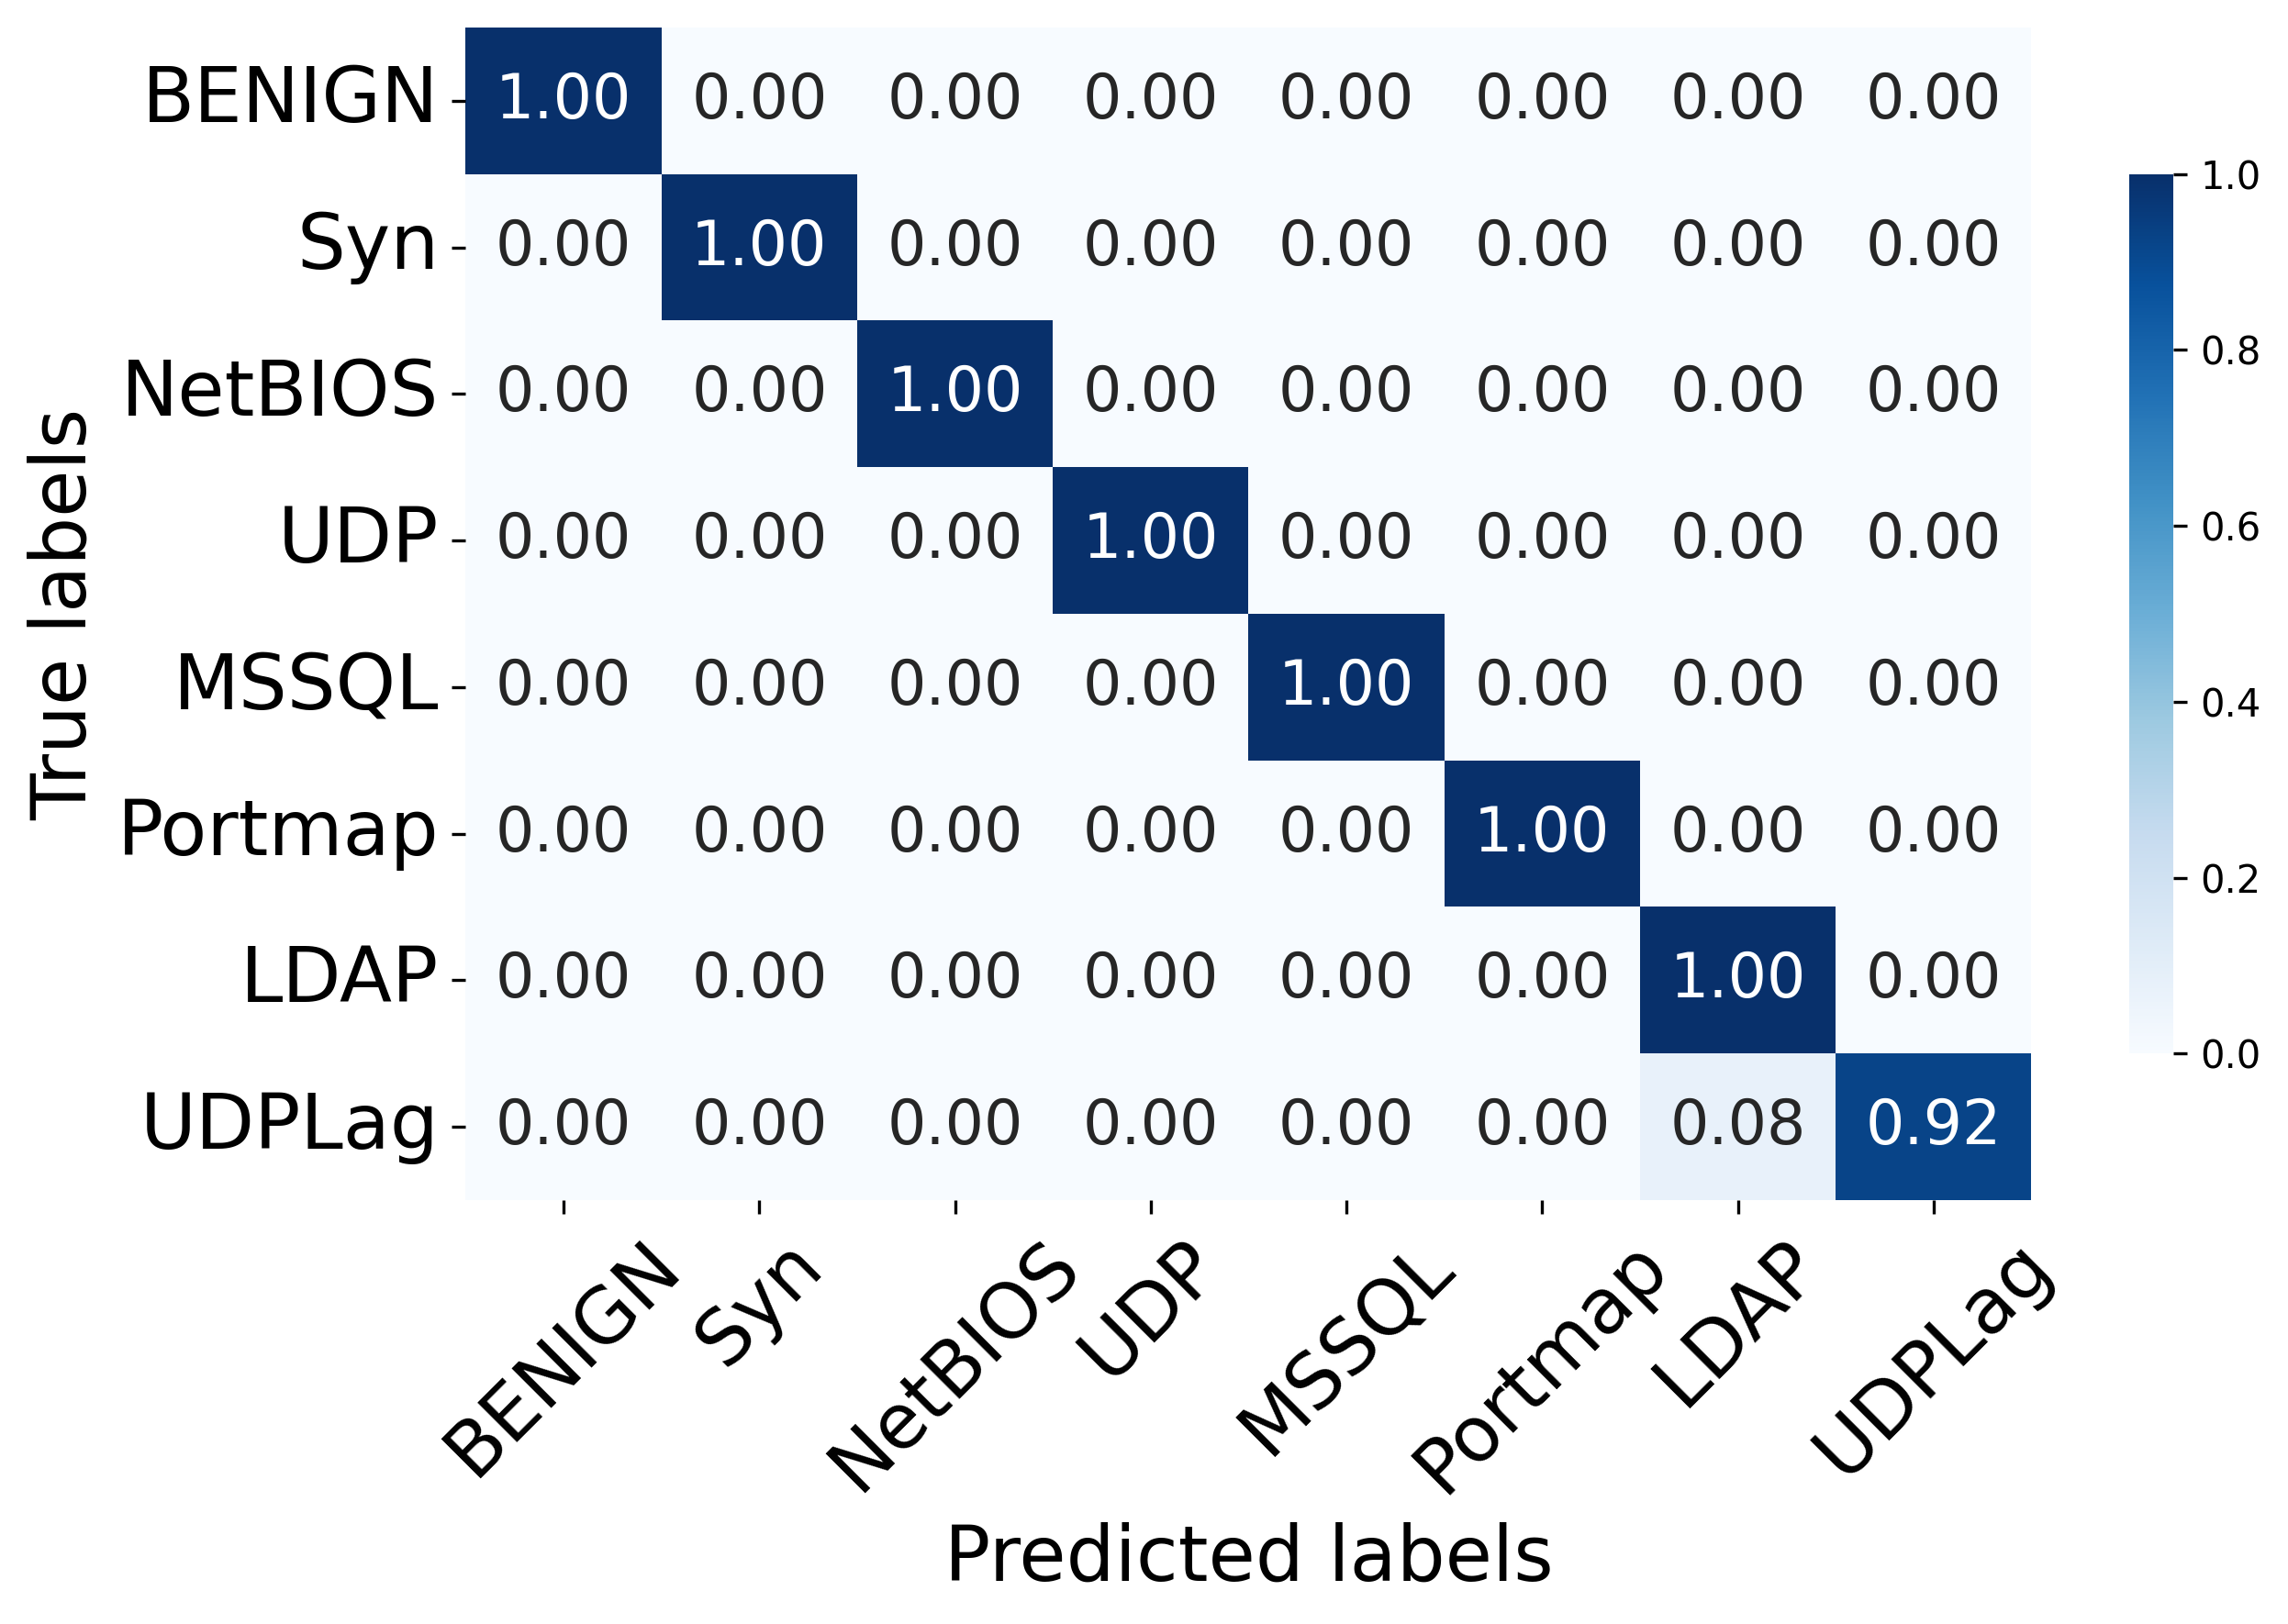

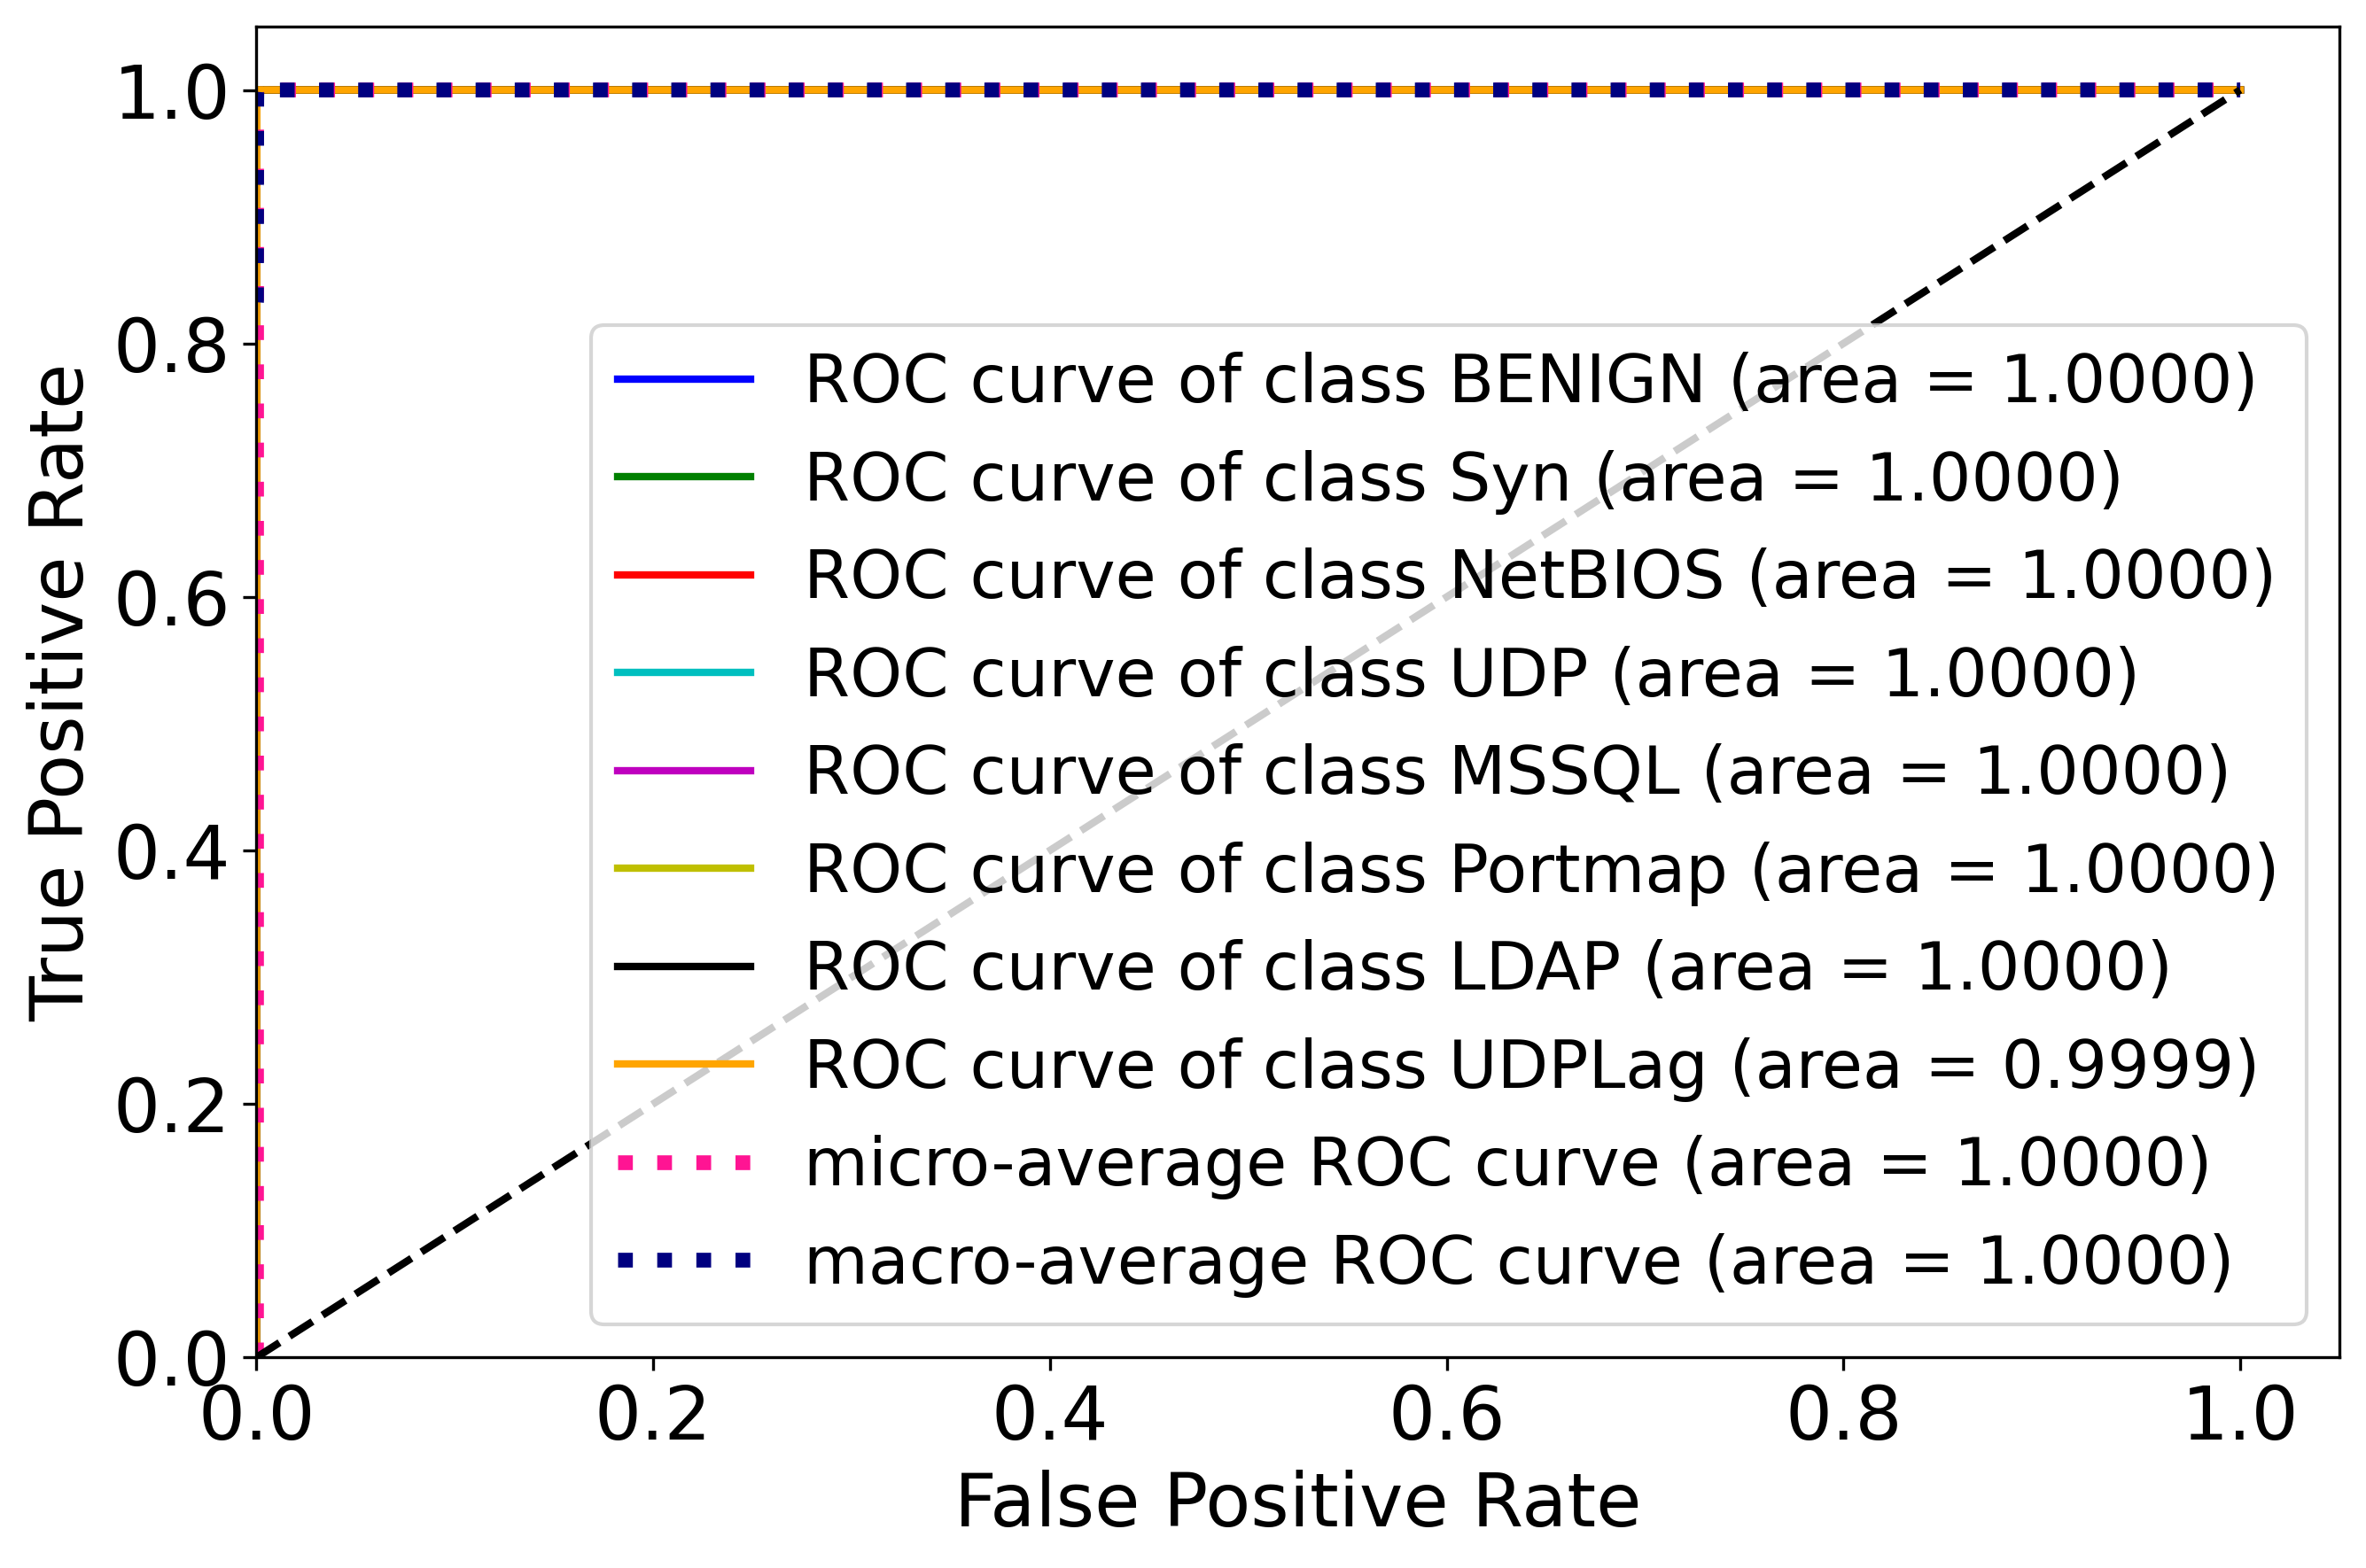

In [ ]:
## Test script Dec.21
# Nov7
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

#  directory for plots
plot_directory = '/content/drive/MyDrive/IDS-Research/CICDDOS2019_PLOTS'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Load the pre-trained model
checkpoint_path = '/content/drive/MyDrive/IDS-Research/Bi_LSTM_Attention_0725.h5'
bigru_attention_model = load_model(checkpoint_path)

# Load the training history
history_path = '/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_MDcic2023_history_0725.npz'
history = np.load(history_path, allow_pickle=True)
history = {key: history[key] for key in history}

### load predicaiton test data
save_dir = '/content/drive/MyDrive/IDS-Research/train_test_data_cicddos2019'

# Create the directory
os.makedirs(save_dir, exist_ok=True)

# Save data
# np.save(os.path.join(save_dir, 'X_train1.npy'), X_train1)
# np.save(os.path.join(save_dir, 'X_test1.npy'), X_test1)
# np.save(os.path.join(save_dir, 'Y_train.npy'), Y_train)
# np.save(os.path.join(save_dir, 'Y_test.npy'), Y_test)



# Load data
# X_train1 = np.load(os.path.join(save_dir, 'X_train1.npy'))
X_test1 = np.load(os.path.join(save_dir, 'X_test1.npy'))
# Y_train = np.load(os.path.join(save_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'Y_test.npy'))

# Make predictions
y_pred_probs = bigru_attention_model.predict(X_test1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot accuracy
# Plot accuracy
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['accuracy'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_accuracy'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['accuracy'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Accuracy_2019_SP_1105.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Plot loss
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(history['loss'][1:], color="green", marker='o', label='Train')
plt.plot(history['val_loss'][1:], color="blue", marker='o', label='Validation')
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(history['loss'][1:]), step=5), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Model_Loss_2019_SP_1105.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


# Confusion matrix
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred, normalize='true')
plt.figure(figsize=(9.0, 6.0), dpi=300)
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            yticklabels=['BENIGN', 'Syn', 'NetBIOS', 'UDP', 'MSSQL', 'Portmap', 'LDAP', 'UDPLag'],
            cbar_kws={'shrink': 0.75,'ticks':np.arange(0.0, 1.1, 0.2)},annot_kws={"size": 16},vmin=0.0, vmax=1.0)  # Shrink color bar to fit better
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=0)  # Keep y-ticks horizontal to avoid overlap
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_SP_1107.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
# plt.savefig(os.path.join(plot_directory, 'Confusion_Matrix_2019_1105.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()


### compute

# Compute ROC curve and ROC area for each class
# Plot ROC curves for each class, micro-average, and macro-average

Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_binarized.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

# Calculate FPR, TPR and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
####

####
# Plot ROC curves for each class, micro-average, and macro-average
plt.figure(figsize=(9.0, 6.0), dpi=300)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {["BENIGN", "Syn", "NetBIOS", "UDP", "MSSQL", "Portmap", "LDAP", "UDPLag"][i]} (area = {roc_auc[i]:.4f})')
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set x-ticks
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set y-ticks
plt.legend(loc="lower right", fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1107.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(plot_directory, 'ROC_Curves_2019_SP_1107.svg'), format='svg', dpi=300, bbox_inches='tight')
plt.show()


